Μέλη ομάδας: Χαράλαμπος Γαγάνης ΑΜ:1115201900030
             Αναστάσιος Αντωνόπουλος ΑΜ:1115201900011

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
#For data analysis

import seaborn as sns
#For heatmaps

import matplotlib.pyplot as plt
#For data visualization

import folium
#For folium map

from wordcloud import WordCloud
#For wordclouds

from sklearn.feature_extraction.text import TfidfVectorizer
# For TF-IDF

from sklearn.metrics.pairwise import cosine_similarity
# For Cosine Similarity

from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
# For collocation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Cleaning

The following code segment is responsible for the initial phase of the data analysis. This includes excluding any unecessary columns, adding new columns if needed (such as the month column), finding any outliers and handling rows with NaN values. In the end, the train_2019 and train_2023 files are ready and we can begin extracting information from them.

In [3]:
#function for excluding non needed columns

def exclude_columns(df, train_columns):
  for col in df.columns:
    if col not in train_columns:
      del df[col]

def remove_outliers(df, col, threshold):

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define outlier boundaries
  lower_bound = Q1 - threshold * IQR
  upper_bound = Q3 + threshold * IQR

  # Filter the DataFrame to exclude outliers
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

#columns needed for the train csv files
train_columns2019 = ["id",
"host_id",
"zipcode",
"transit",
"bedrooms",
"beds",
"review_scores_rating",
"number_of_reviews",
"neighbourhood",
"name",
"latitude",
"longitude",
"last_review",
"instant_bookable",
"host_since",
"host_response_rate",
"host_identity_verified",
"host_has_profile_pic",
"first_review",
"description",
"city",
"cancellation_policy",
"bed_type",
"bathrooms",
"accommodates",
"amenities",
"room_type",
"property_type",
"price",
"availability_365",
"minimum_nights"]

#february 2019 dataframe

path = r'/content/gdrive/MyDrive/data/2019/febrouary/listings.csv'
february_2019 = pd.read_csv(path)
exclude_columns(february_2019, train_columns2019)
february_2019['month'] = 'February'

#march 2019 dataframe

path = r'/content/gdrive/MyDrive/data/2019/march/listings.csv'
march_2019 = pd.read_csv(path)
exclude_columns(march_2019, train_columns2019)
march_2019['month'] = 'March'

#april 2019 dataframe

path = r'/content/gdrive/MyDrive/data/2019/april/listings.csv'
april_2019 = pd.read_csv(path)
exclude_columns(april_2019, train_columns2019)
april_2019['month'] = 'April'

#concatenating the data frames
train_2019 = pd.concat([february_2019, march_2019, april_2019])
del train_2019['transit']
del train_2019['first_review']
del train_2019['last_review']

#turning prices from strings to floats
train_2019['price'] = train_2019['price'].astype("string")
train_2019['price'] = train_2019['price'].str.replace("$","")
train_2019['price'] = train_2019['price'].str.replace(",","")
train_2019['price'] = train_2019['price'].astype("float")

mean_review_scores_rating = (train_2019['review_scores_rating'].mean())
train_2019['review_scores_rating'].fillna(mean_review_scores_rating, inplace = True)
train_2019.dropna(inplace = True)

train_2019.info()

train_2019 = remove_outliers(train_2019, 'price' , 4)

train_2019 = remove_outliers(train_2019, 'beds' , 4)

train_2019 = remove_outliers(train_2019, 'accommodates' , 4)

train_2019 = remove_outliers(train_2019, 'minimum_nights' , 4)

train_2019 = remove_outliers(train_2019, 'number_of_reviews' , 4)

train_2019 = remove_outliers(train_2019, 'availability_365' , 4)

train_2019 = remove_outliers(train_2019, 'review_scores_rating' , 4)


train_2019.info()
train_2019.to_csv('train_2019.csv')

<ipython-input-3-596264283b9d>:62: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  february_2019 = pd.read_csv(path)
<ipython-input-3-596264283b9d>:69: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  march_2019 = pd.read_csv(path)
<ipython-input-3-596264283b9d>:76: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  april_2019 = pd.read_csv(path)


<class 'pandas.core.frame.DataFrame'>
Index: 21989 entries, 0 to 9649
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      21989 non-null  int64  
 1   name                    21989 non-null  object 
 2   description             21989 non-null  object 
 3   host_id                 21989 non-null  int64  
 4   host_since              21989 non-null  object 
 5   host_response_rate      21989 non-null  object 
 6   host_has_profile_pic    21989 non-null  object 
 7   host_identity_verified  21989 non-null  object 
 8   neighbourhood           21989 non-null  object 
 9   city                    21989 non-null  object 
 10  zipcode                 21989 non-null  object 
 11  latitude                21989 non-null  float64
 12  longitude               21989 non-null  float64
 13  property_type           21989 non-null  object 
 14  room_type               21989 non-null  obje

In [4]:
#columns needed for the train csv files
train_columns2023 = ["id",
"host_id",
"zipcode",
"transit",
"bedrooms",
"beds",
"review_scores_rating",
"number_of_reviews",
"neighbourhood_cleansed",
"name",
"latitude",
"longitude",
"last_review",
"instant_bookable",
"host_since",
"host_response_rate",
"host_identity_verified",
"host_has_profile_pic",
"first_review",
"description",
"city",
"cancellation_policy",
"bed_type",
"bathrooms",
"accommodates",
"amenities",
"room_type",
"property_type",
"price",
"availability_365",
"minimum_nights"]

#june 2023 dataframe

path = r'/content/gdrive/MyDrive/data/2023/june/listings.csv'
june2023 = pd.read_csv(path)
exclude_columns(june2023, train_columns2023)
june2023['month'] = 'June'

#march 2023 dataframe

path = r'/content/gdrive/MyDrive/data/2023/march/listings.csv'
march2023 = pd.read_csv(path)
exclude_columns(march2023, train_columns2023)
march2023['month'] = 'March'

#september 2023 dataframe

path = r'/content/gdrive/MyDrive/data/2023/september/listings.csv'
september2023 = pd.read_csv(path)
exclude_columns(september2023, train_columns2023)
september2023['month'] = 'September'

#concatenating the data frames
train_2023 = pd.concat([june2023, march2023, september2023])
del train_2023['bathrooms']
del train_2023['host_response_rate']
del train_2023['first_review']
del train_2023['last_review']

#turning prices from strings to floats
train_2023['price'] = train_2023['price'].astype("string")
train_2023['price'] = train_2023['price'].str.replace("$","")
train_2023['price'] = train_2023['price'].str.replace(",","")
train_2023['price'] = train_2023['price'].astype("float")

mean_review_scores_rating = (train_2023['review_scores_rating'].mean())
train_2023['review_scores_rating'].fillna(mean_review_scores_rating, inplace = True)
train_2023.dropna(inplace = True)

train_2023.info()
train_2023 = remove_outliers(train_2023, 'price' , 4)

train_2023 = remove_outliers(train_2023, 'beds' , 4)

train_2023 = remove_outliers(train_2023, 'accommodates' , 4)

train_2023 = remove_outliers(train_2023, 'minimum_nights' , 4)

train_2023 = remove_outliers(train_2023, 'number_of_reviews' , 4)

train_2023 = remove_outliers(train_2023, 'availability_365' , 4)

train_2023 = remove_outliers(train_2023, 'review_scores_rating' , 4)


train_2023.info()
train_2023.to_csv('train_2023.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 32688 entries, 0 to 12954
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      32688 non-null  int64  
 1   name                    32688 non-null  object 
 2   description             32688 non-null  object 
 3   host_id                 32688 non-null  int64  
 4   host_since              32688 non-null  object 
 5   host_has_profile_pic    32688 non-null  object 
 6   host_identity_verified  32688 non-null  object 
 7   neighbourhood_cleansed  32688 non-null  object 
 8   latitude                32688 non-null  float64
 9   longitude               32688 non-null  float64
 10  property_type           32688 non-null  object 
 11  room_type               32688 non-null  object 
 12  accommodates            32688 non-null  int64  
 13  bedrooms                32688 non-null  float64
 14  beds                    32688 non-null  flo

# 1.1 Most Common Room Type

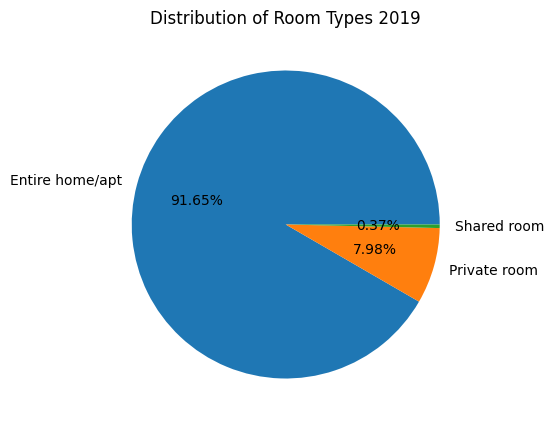

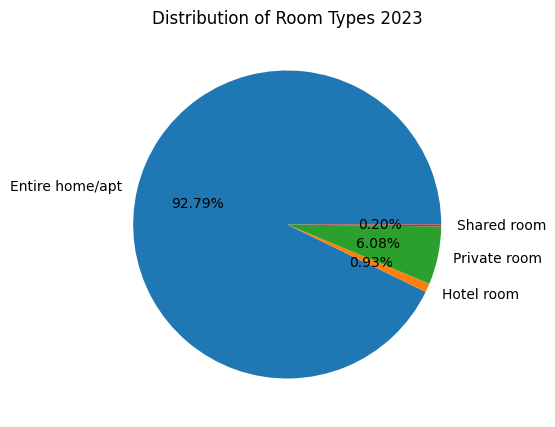

In [5]:
#1.1

room_types = train_2019.groupby('room_type').size()

plt.figure(figsize=(5, 5))
plt.pie(room_types, labels=room_types.index, autopct='%2.2f%%')
plt.title('Distribution of Room Types 2019')
plt.show()

room_types = train_2023.groupby('room_type').size()

plt.figure(figsize=(5, 5))
plt.pie(room_types, labels=room_types.index, autopct='%2.2f%%')
plt.title('Distribution of Room Types 2023')
plt.show()

The most common room type for both 2019 and 2023 is Entire home/apt.

# 1.2 Price changes during the three month period

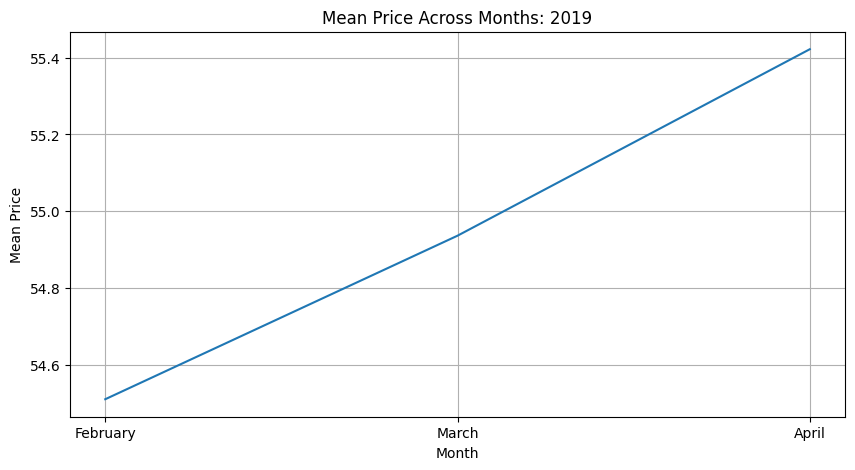

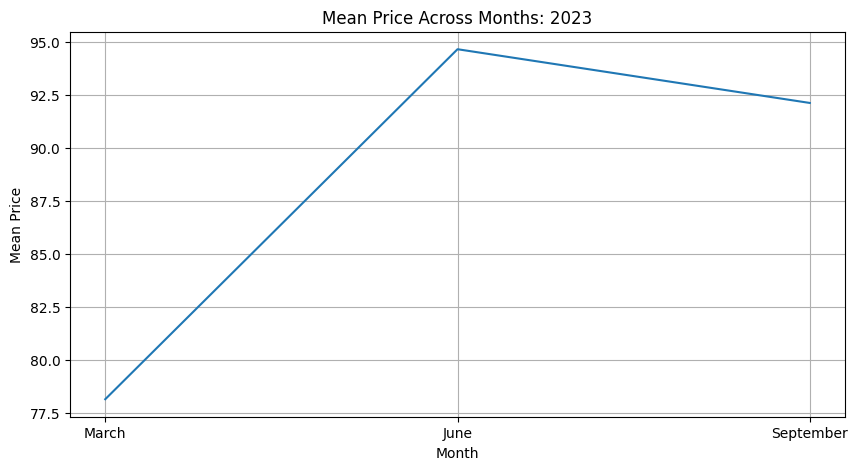

In [6]:
#1.2

monthly_prices = train_2019.groupby('month')['price'].mean()

# Reorder the months for plotting
months_order = ['February', 'March', 'April']

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_prices.loc[months_order])
plt.xlabel('Month')
plt.ylabel('Mean Price')
plt.title('Mean Price Across Months: 2019')
plt.grid(True)
plt.show()

monthly_prices = train_2023.groupby('month')['price'].mean()

# Reorder the months for plotting
months_order = ['March', 'June', 'September']

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_prices.loc[months_order])
plt.xlabel('Month')
plt.ylabel('Mean Price')
plt.title('Mean Price Across Months: 2023')
plt.grid(True)
plt.show()


In 2019, we can see a price increase from February to March and from March to April. In 2023, there was a big price increase from March to June and a small drop from June to September.

#1.3 Top five most reviewed neighbourhoods

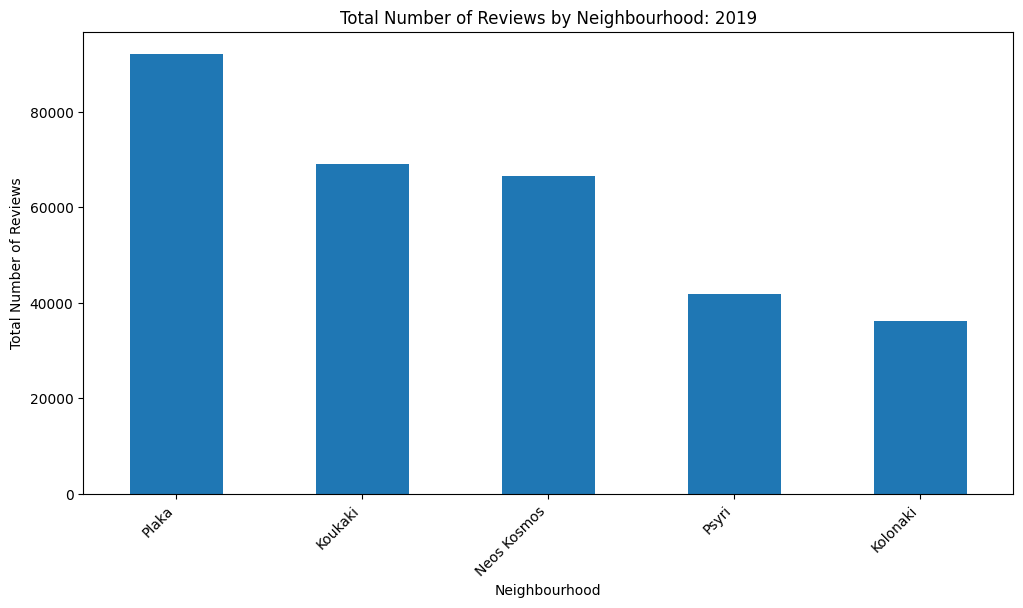

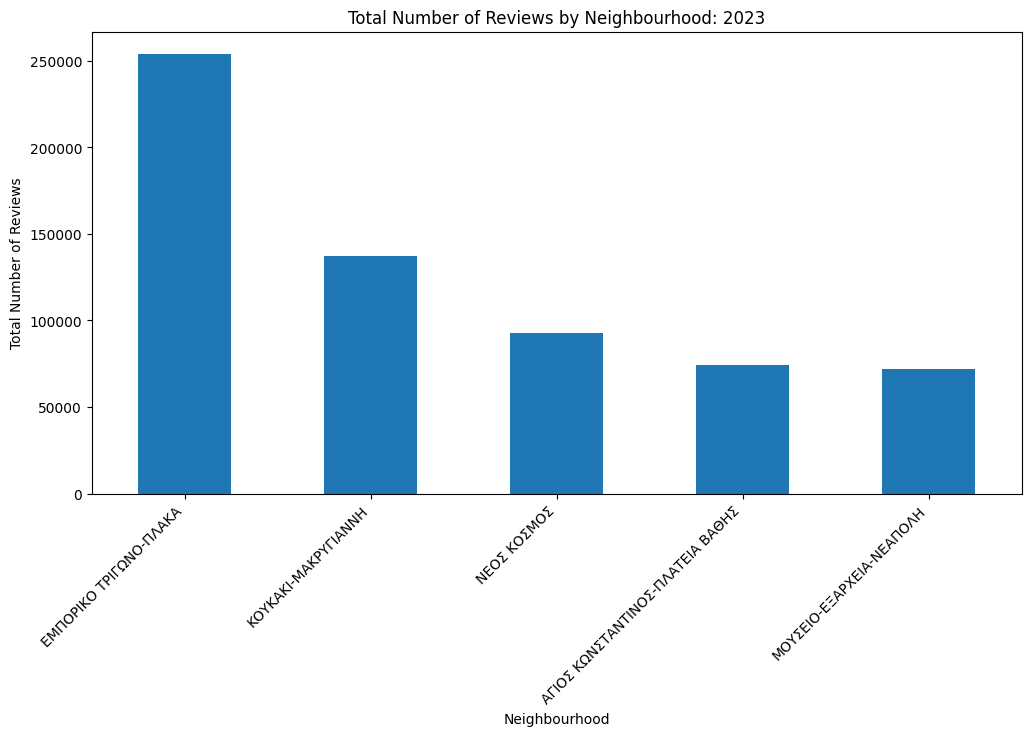

In [7]:
#1.3

most_reviewed = train_2019.groupby('neighbourhood')['number_of_reviews'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
most_reviewed.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Number of Reviews')
plt.title('Total Number of Reviews by Neighbourhood: 2019')
plt.xticks(rotation=45, ha='right')
plt.show()

most_reviewed = train_2023.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
most_reviewed.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Number of Reviews')
plt.title('Total Number of Reviews by Neighbourhood: 2023')
plt.xticks(rotation=45, ha='right')
plt.show()

In both years, the top three most reviewed neighbourhoods were Plaka, Koukaki and Neos Kosmos. After those three, in 2019 Psyri and Metaxourgeio take the last two places. In 2023, the 4th most reviewed neighbourhood was Agios Konstantinos and the 5th one was Exarcheia.



# 1.4 Neighbourhood with the most listings

In [8]:
#1.4

id_count_per_nbhd = train_2019.groupby('neighbourhood')['id'].count()

"""plt.figure(figsize=(12, 6))
id_count_per_nbhd.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Number of Entries')
plt.title('Total Number of Entries by Neighbourhood: 2019')
plt.show()"""

print("The neighbourhood with the most listings in 2019 is", id_count_per_nbhd.idxmax(), "with", id_count_per_nbhd.max(), "listings.")

id_count_per_nbhd = train_2023.groupby('neighbourhood_cleansed')['id'].count()

"""plt.figure(figsize=(12, 6))
id_count_per_nbhd.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Number of Entries')
plt.title('Total Number of Entries by Neighbourhood: 2023')
plt.show()"""

print("The neighbourhood with the most listings in 2023 is", id_count_per_nbhd.idxmax(), "with", id_count_per_nbhd.max(), "listings.")

The neighbourhood with the most listings in 2019 is Plaka with 2385 listings.
The neighbourhood with the most listings in 2023 is ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ with 5357 listings.


In both years, the neighbourhood with the most listings was Plaka.


# 1.5 Listings per neighbourhood per month

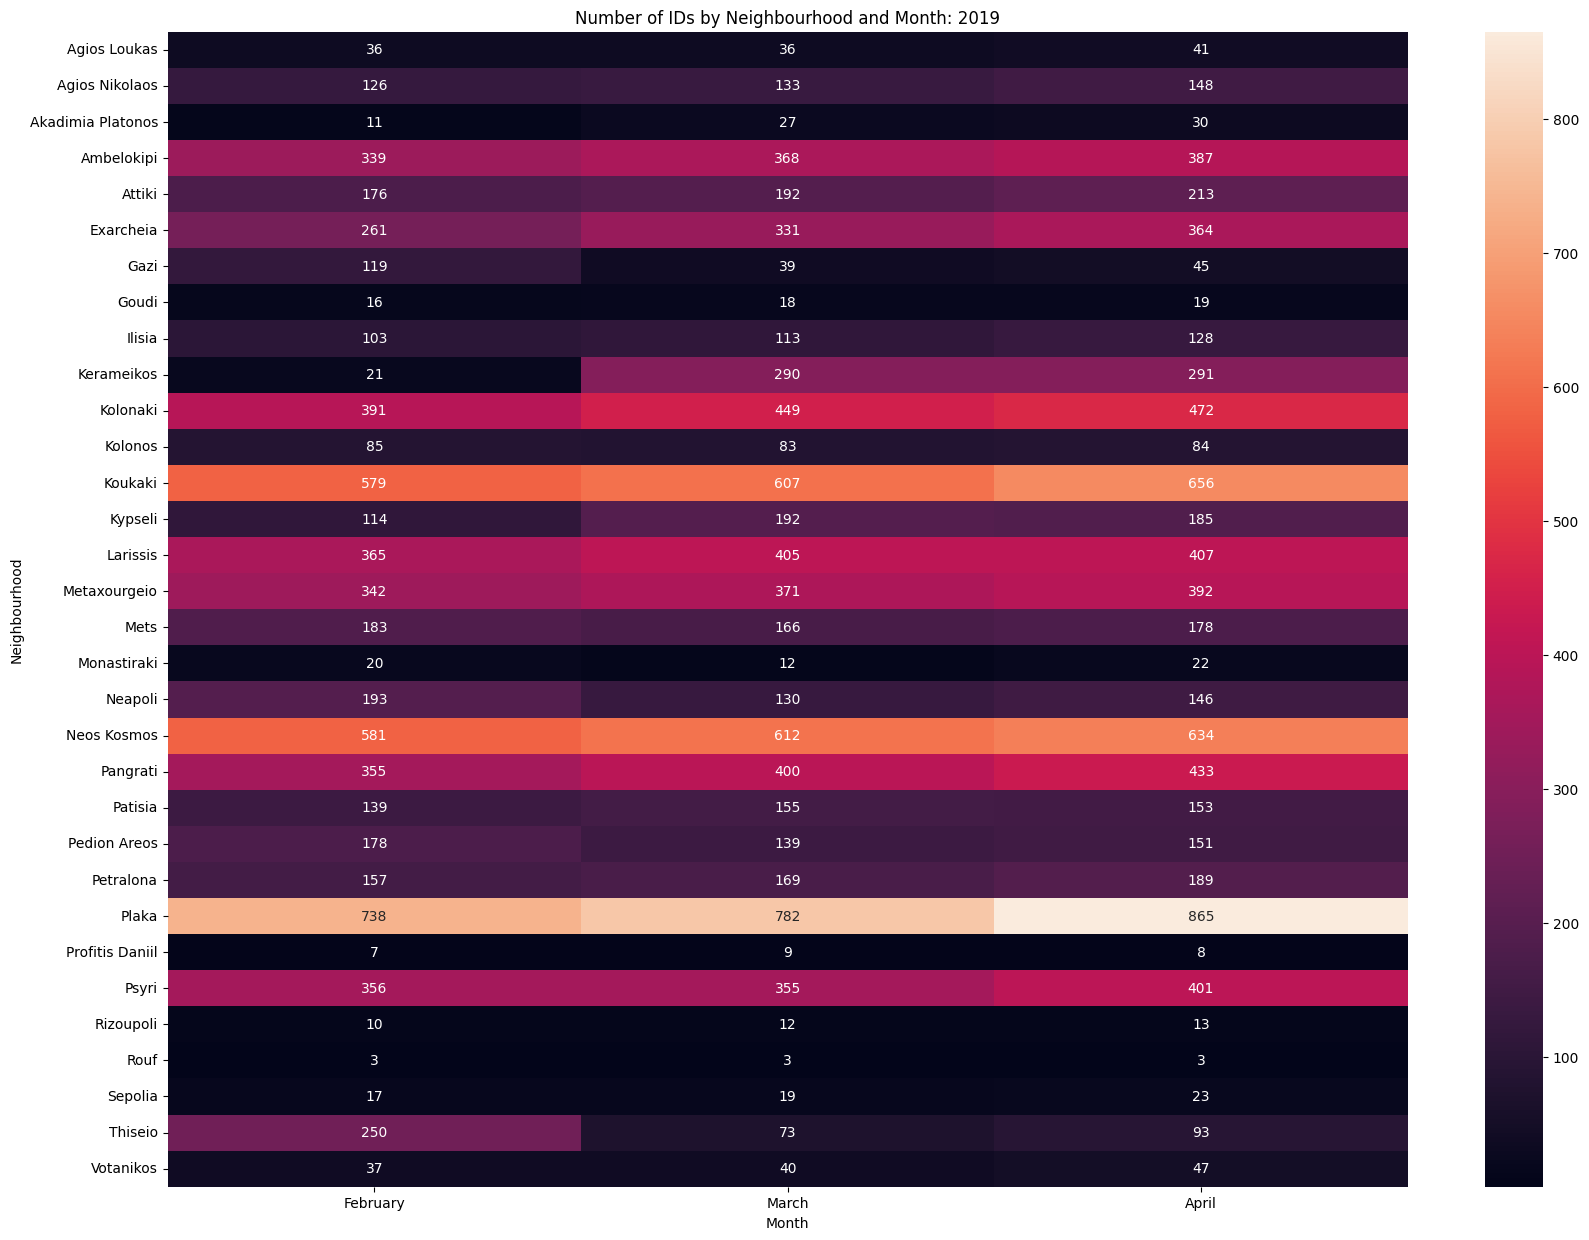

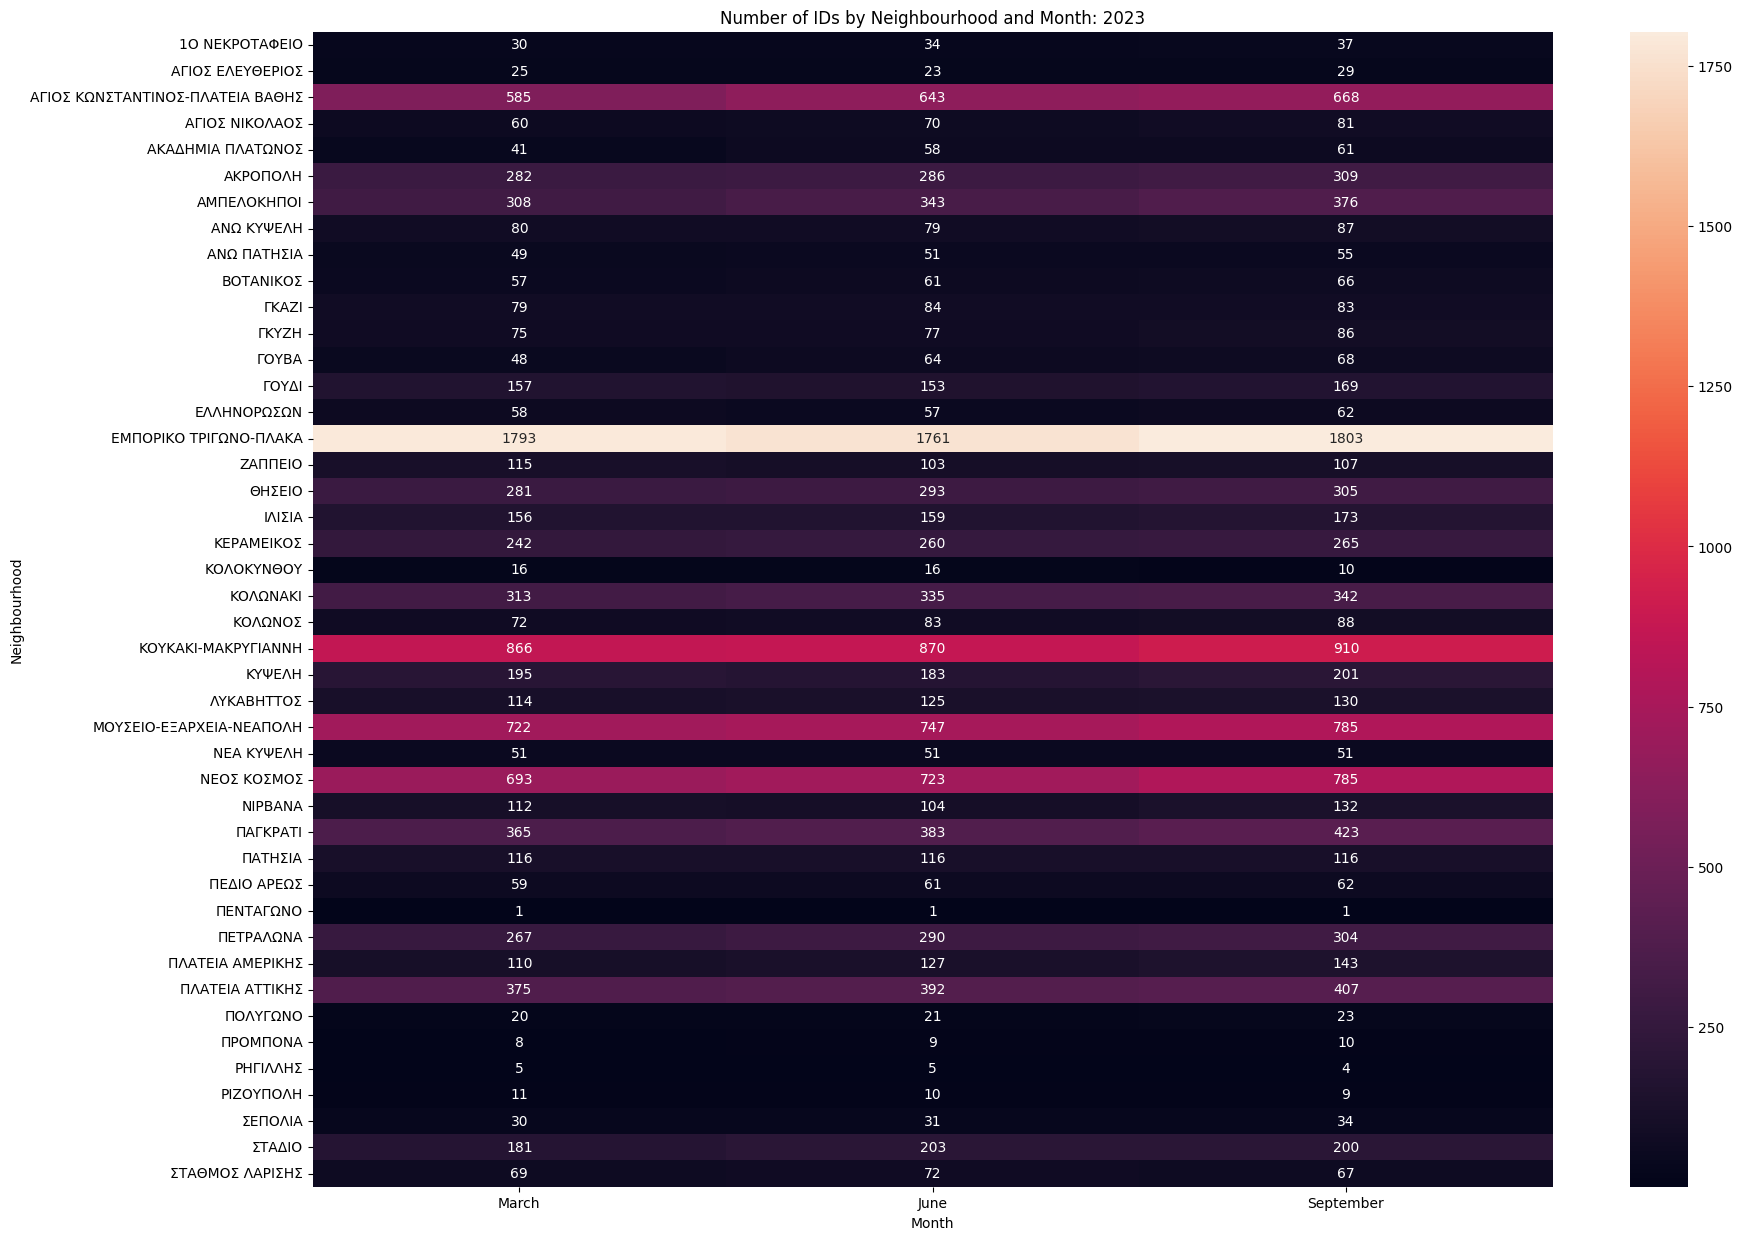

In [9]:
# 1.5

# Group by 'neighbourhood' and 'month', and count the number of entries
neighbourhood_counts = train_2019.groupby(['neighbourhood', 'month'])['id'].count().unstack()

# Set the order of the months
months_order = ['February', 'March', 'April']

# Plotting
plt.figure(figsize=(20, 15))
sns.heatmap(neighbourhood_counts[months_order], annot=True, fmt='d')
plt.xlabel('Month')
plt.ylabel('Neighbourhood')
plt.title('Number of IDs by Neighbourhood and Month: 2019')
plt.show()

# Group by 'neighbourhood' and 'month', and count the number of entries
neighbourhood_counts = train_2023.groupby(['neighbourhood_cleansed', 'month'])['id'].count().unstack()

# Set the order of the months
months_order = ['March', 'June', 'September']

# Plotting
plt.figure(figsize=(20, 15))
sns.heatmap(neighbourhood_counts[months_order], annot=True, fmt='d')
plt.xlabel('Month')
plt.ylabel('Neighbourhood')
plt.title('Number of IDs by Neighbourhood and Month: 2023')
plt.show()

# 1.6 Neighbourhood Histogram

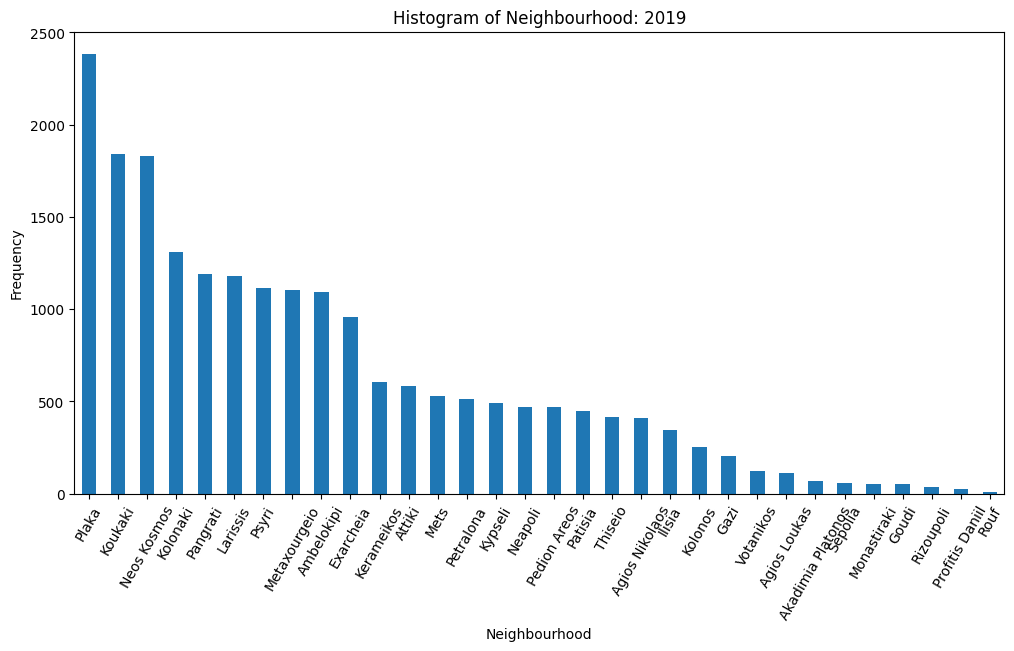

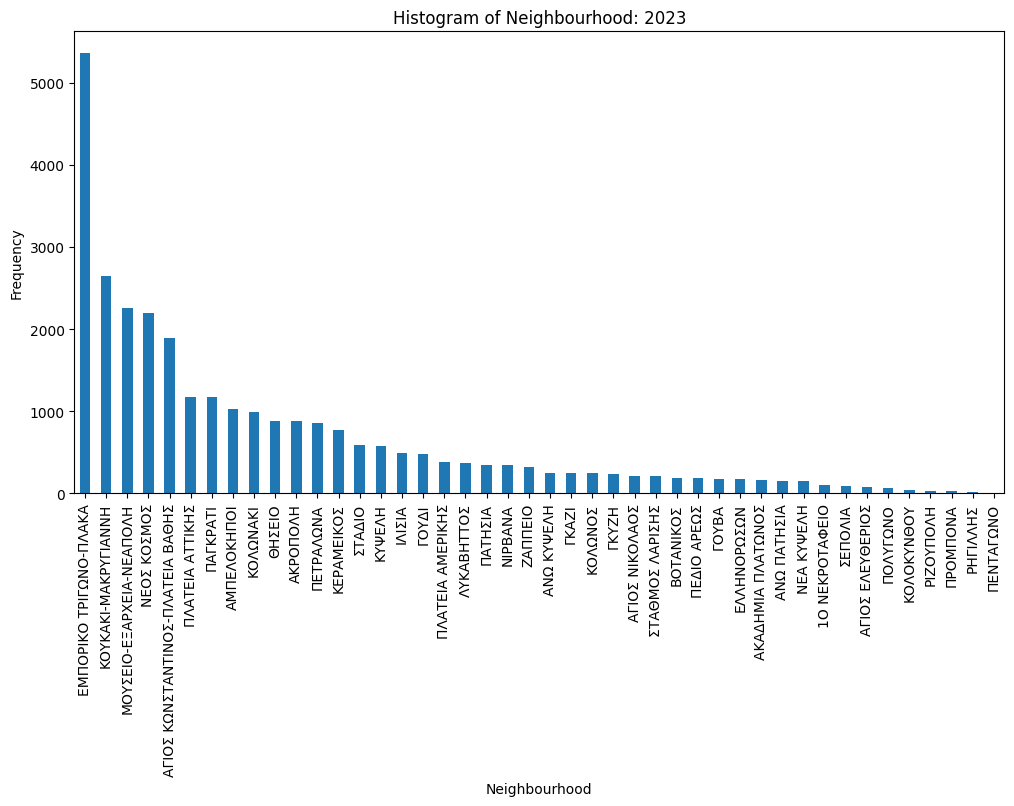

In [10]:
# 1.6

plt.figure(figsize=(12, 6))
train_2019['neighbourhood'].value_counts().plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')
plt.title('Histogram of Neighbourhood: 2019')
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(12, 6))
train_2023['neighbourhood_cleansed'].value_counts().plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')
plt.title('Histogram of Neighbourhood: 2023')
plt.xticks(rotation=90)
plt.show()

We can see many of the same neighbourhoods in both years, with some having bigger increases in listings than others. More specifically, there has been a bigger increase in listings in the areas of Exarcheia, Attiki, Petralona and more.

# 1.7 Most Common Room Type for each Neighbourhood

<Figure size 34000x32000 with 0 Axes>

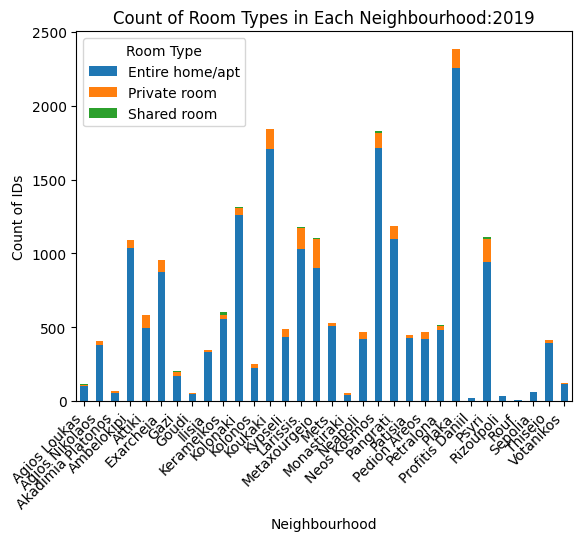

<Figure size 34000x32000 with 0 Axes>

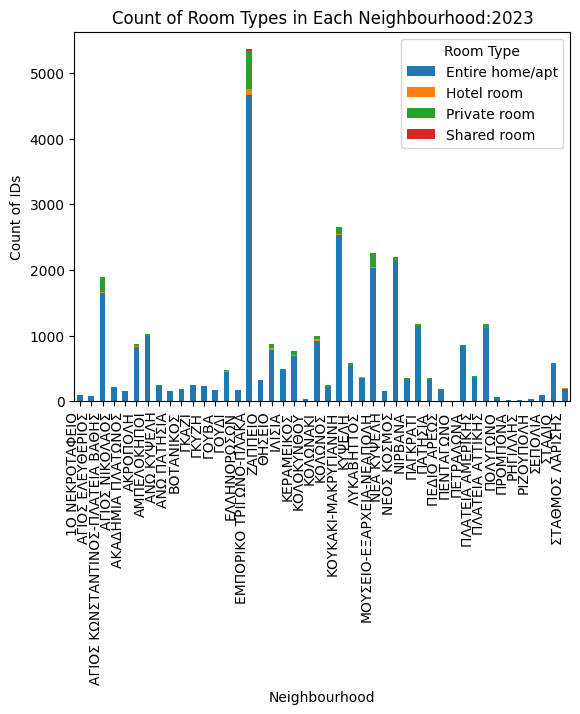

In [11]:
#1.7

most_common_room_type = train_2019.groupby(['neighbourhood', 'room_type'])['id'].count().unstack()
plt.figure(figsize=(340, 320))
most_common_room_type.plot(kind='bar', stacked=True)
plt.xlabel('Neighbourhood')
plt.ylabel('Count of IDs')
plt.title('Count of Room Types in Each Neighbourhood:2019')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Room Type')
plt.show()

most_common_room_type = train_2023.groupby(['neighbourhood_cleansed', 'room_type'])['id'].count().unstack()
plt.figure(figsize=(340, 320))
most_common_room_type.plot(kind='bar', stacked=True)
plt.xlabel('Neighbourhood')
plt.ylabel('Count of IDs')
plt.title('Count of Room Types in Each Neighbourhood:2023')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Room Type')
plt.show()

In every neighbourhood, the most common room type is Entire home/apt by a large margin.

# 1.8 Most Expensive Room Type

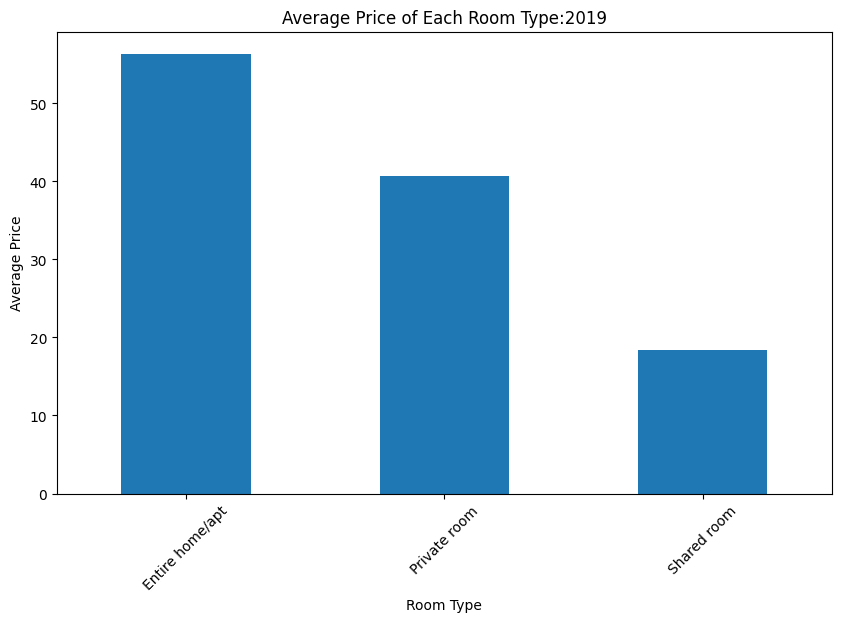

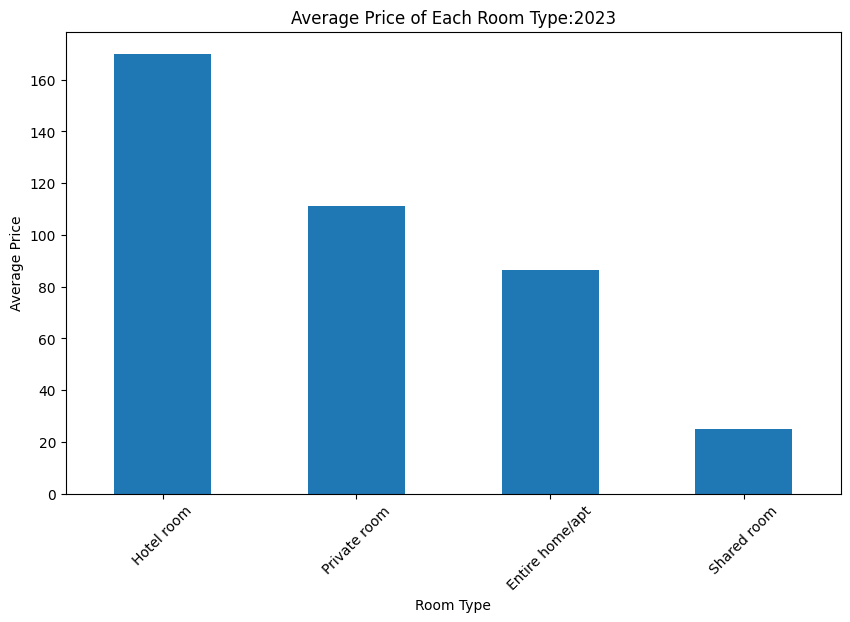

In [12]:
#1.8

most_expensive_room_type = train_2019.groupby('room_type')['price'].mean()
plt.figure(figsize=(10, 6))
most_expensive_room_type.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price of Each Room Type:2019')
plt.xticks(rotation=45)
plt.show()

most_expensive_room_type = train_2023.groupby('room_type')['price'].mean()
plt.figure(figsize=(10, 6))
most_expensive_room_type.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price of Each Room Type:2023')
plt.xticks(rotation=45)
plt.show()

In 2019, the most expensive room type is entire home/apt. In 2023, the most expensive room type is hotel rooms.

# 1.9 Folium Map

In [13]:
#1.9

# Create a map centered at a specific location
latitude = train_2019['latitude'].mean()
longitude = train_2019['longitude'].mean()
m = folium.Map(location=[latitude, longitude], zoom_start=13)  # Specify latitude and longitude for the center of the map
feb = train_2019[train_2019['month'].isin(['February'])].sample(frac=0.05)
# Add markers for each neighborhood
for index, row in feb.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=[row['room_type'], row['bed_type']]).add_to(m)

# Display the map
m

# 1.10 Wordclouds for neighbourhood and description columns


Wordcloud for 2019 neighbourhoods



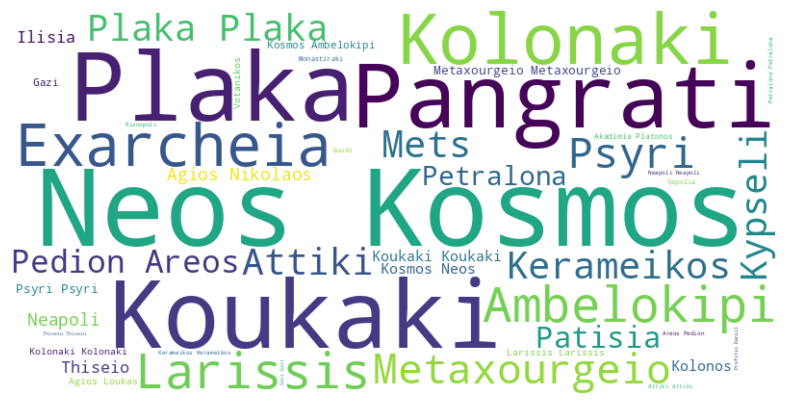


Wordcloud for 2019 description



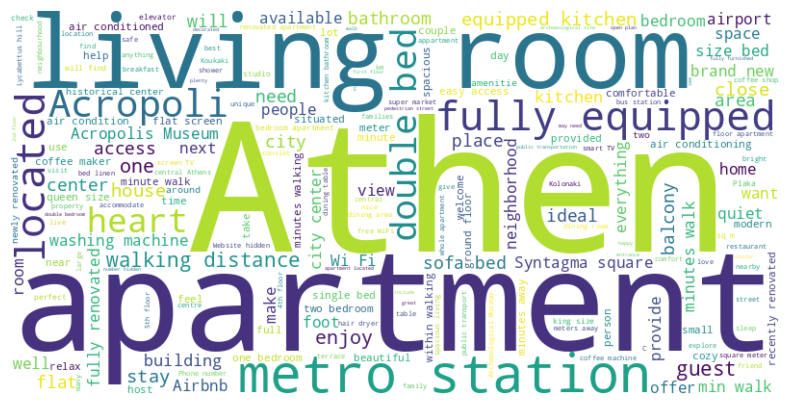


Wordcloud for 2023 neighbourhoods



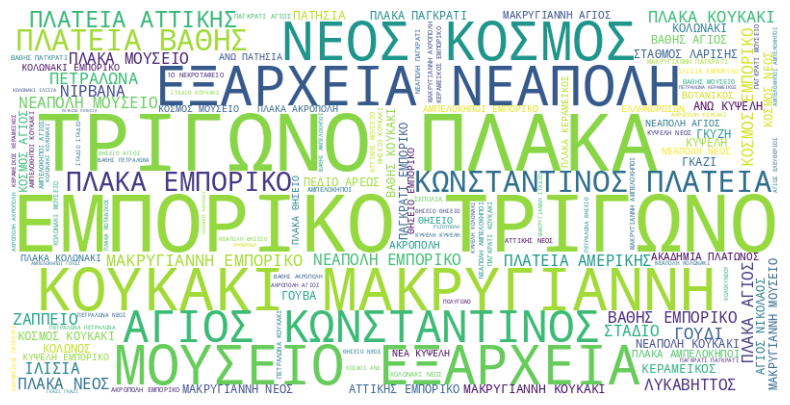


Wordcloud for 2023 description



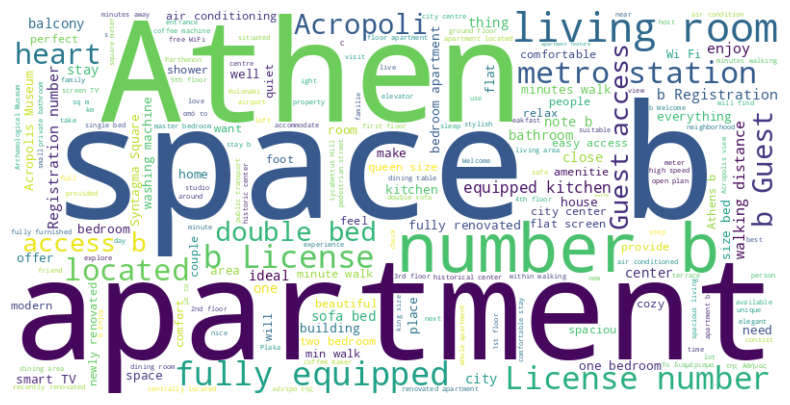

In [24]:
#1.10

text = ' '.join(train_2019['neighbourhood'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

print("\nWordcloud for 2019 neighbourhoods\n")

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

text = text = ' '.join(train_2019['description'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

print("\nWordcloud for 2019 description\n")

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

text = ' '.join(train_2023['neighbourhood_cleansed'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

print("\nWordcloud for 2023 neighbourhoods\n")

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

text = text = ' '.join(train_2023['description'])
text = text.replace('br','')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

print("\nWordcloud for 2023 description\n")

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 1.11 Most common amenities

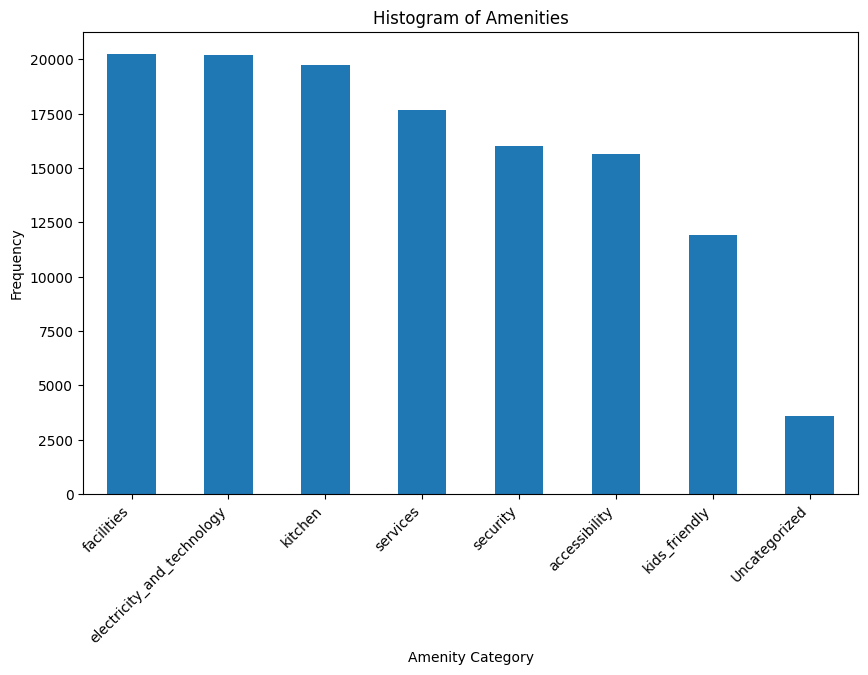

In [15]:
#1.11

amenities_mapping = {
    "kitchen": ['Breakfast','Kitchen', 'Oven', 'Stove', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Double oven', 'Espresso machine', 'Convection oven', 'Mini fridge', 'Outdoor seating', 'Gas oven', 'Kitchenette', 'Full kitchen', 'BBQ grill', 'Double oven', 'Formal dining area', 'Breakfast table', 'Mini fridge', 'Sound system', 'Coffee maker', 'Projector and screen', 'Full kitchen'],
    "accessibility": ['Wide doorway','Well-lit path to entrance','Elevator', 'Step-free access', 'Wide clearance to bed', 'Wide clearance to shower', 'toilet', 'Wide entryway', 'Disabled parking spot', 'Roll-in shower', 'Accessible-height bed', 'Accessible-height toilet', 'Single level home', 'Shower chair', 'Ground floor access', 'Step-free access', 'Wide clearance to bed', 'Wide entryway', 'Flat path to front door', 'Wide hallway clearance', 'Fixed grab bars for shower', 'Fixed grab bars for toilet', 'Wheelchair accessible'],
    "electricity_and_technology": ['Keypad','Pocket wifi','TV', 'Cable TV', 'Internet', 'Wifi', 'Ethernet connection', 'Laptop friendly workspace', 'High-resolution computer monitor', 'Amazon Echo', 'Netflix', 'Smart lock', 'Smart TV', 'Sound system', 'High-resolution computer monitor', 'Printer', 'Fax machine', 'Wine cooler', 'Electric profiling bed', 'EV charger'],
    "facilities": ['Pool','Indoor fireplace','Gym','Hot tub','Free street parking','Patio or balcony','Extra pillows and blankets','Bed linens','Hot water', 'Handheld shower head','Shared gym','Air conditioning', 'Heating', 'Washer', 'Dryer', 'First aid kit', 'Safety card', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Bathtub', 'Room-darkening shades', 'Bathtub with bath chair', 'Stand alone steam shower', 'Jetted tub', 'Alfresco bathtub', 'Ceiling fan', 'Outdoor seating', 'Heated towel rack', 'Sun loungers', 'Beach essentials', 'HBO GO', 'Elevator', 'Heating'],
    "kids_friendly": ['Baby bath','Family/kid friendly', 'Crib', 'High chair', 'Pack ’n Play/travel crib', 'Children’s books and toys', 'Game console', 'Stair gates', 'Baby monitor', 'Changing table', 'Babysitter recommendations', 'Children’s dinnerware'],
    "security": ['Buzzer/wireless intercom', 'Lock on bedroom door', 'Smoke detector', 'Carbon monoxide detector', 'Paid parking off premises', 'Doorman', 'Lockbox', 'Luggage dropoff allowed', 'Lockbox', 'Room-darkening shades', 'Window guards', 'Security staff', 'Fireplace guards', 'Table corner guards', 'Outlet covers', 'Fire extinguisher'],
    "services": ['Suitable for events','Long term stays allowed','Host greets you', 'Cleaning before checkout', '24-hour check-in', 'Self check-in', 'Building staff', 'Free parking on premises', 'Pets allowed', 'Smoking allowed', 'Private entrance', 'Garden or backyard', 'Private living room', 'Handheld shower head']
}

# Function to map each amenity to its corresponding category
def map_amenity_to_category(amenity):
    for category, amenities in amenities_mapping.items():
        if amenity in amenities:
            return category
    return "Uncategorized"  # If amenity doesn't belong to any category

# Define a function to preprocess the amenities
def preprocess_amenities(amenities):
    # Remove curly braces and quotes, and split the string by commas
    amenities_list = amenities.strip('{}').replace('"', '').split(',')
    # Strip leading and trailing spaces from each amenity
    amenities_list = [amenity.strip() for amenity in amenities_list]
    return amenities_list

# Apply the preprocessing function to the 'amenities' column
train_2019['amenities_normalized'] = train_2019['amenities'].apply(preprocess_amenities)

# Create a new column 'amenity_category' in train_2019 dataframe
train_2019['simplified_amenities'] = train_2019['amenities_normalized'].apply(lambda x: set(map_amenity_to_category(amenity) for amenity in x))

# Flatten the sets in the 'simplified_amenities' column and count the occurrences of each category
amenities_count = train_2019['simplified_amenities'].explode().value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
amenities_count.plot(kind='bar')
plt.title('Histogram of Amenities')
plt.xlabel('Amenity Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

As we can see the most common amenity types offered are facilities and technology-based, while the least common ones are the ones having to do with accessibility and kids-friendliness.

# 1.12 Expensive, average and affordable neighbourhoods

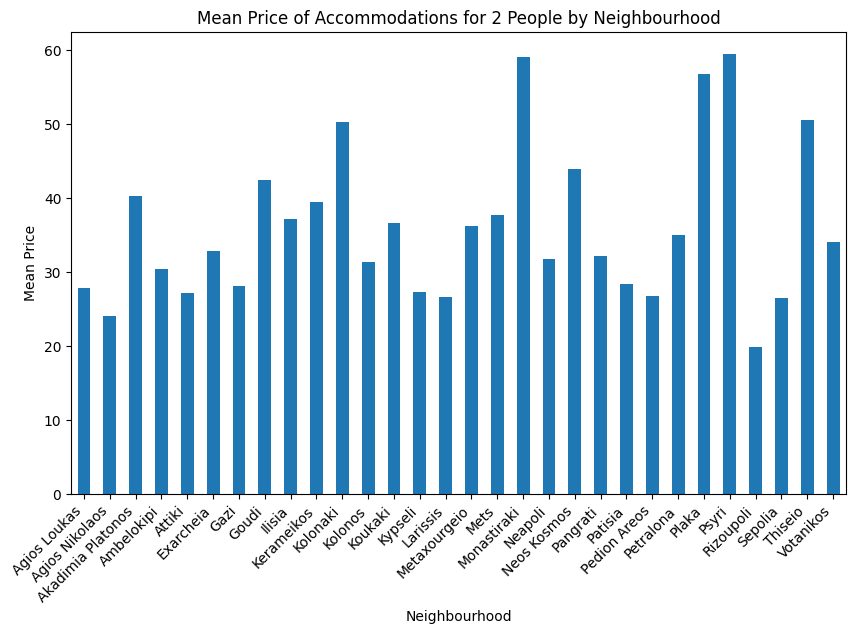

Expensive Neighborhoods:
neighbourhood
Akadimia Platonos    40.333333
Goudi                42.500000
Kerameikos           39.515152
Kolonaki             50.225989
Mets                 37.777778
Monastiraki          59.080000
Neos Kosmos          43.879397
Plaka                56.717466
Psyri                59.462329
Thiseio              50.538462
Name: price, dtype: float64

Average Price Neighborhoods:
neighbourhood
Ambelokipi      30.355634
Exarcheia       32.835341
Ilisia          37.188235
Kolonos         31.402174
Koukaki         36.638806
Metaxourgeio    36.186508
Neapoli         31.707692
Pangrati        32.205128
Petralona       35.017699
Votanikos       34.034483
Name: price, dtype: float64

Affordable Neighborhoods:
neighbourhood
Agios Loukas      27.846154
Agios Nikolaos    24.061856
Attiki            27.142857
Gazi              28.105263
Kypseli           27.310976
Larissis          26.679842
Patisia           28.393939
Pedion Areos      26.727848
Rizoupoli         19.85714

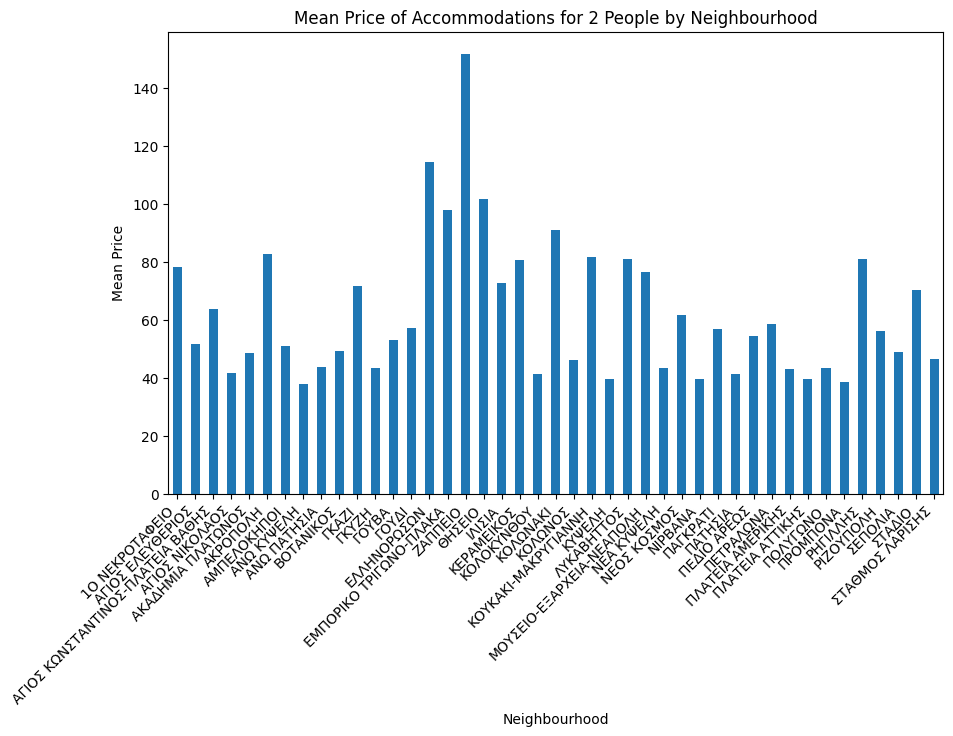

Expensive Neighborhoods:
neighbourhood_cleansed
1Ο ΝΕΚΡΟΤΑΦΕΙΟ               78.150000
ΑΚΡΟΠΟΛΗ                     82.643836
ΓΚΑΖΙ                        71.687500
ΕΛΛΗΝΟΡΩΣΩΝ                 114.512821
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ       97.872554
ΖΑΠΠΕΙΟ                     151.885714
ΘΗΣΕΙΟ                      101.603659
ΙΛΙΣΙΑ                       72.706349
ΚΕΡΑΜΕΙΚΟΣ                   80.565421
ΚΟΛΩΝΑΚΙ                     91.094556
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ          81.627417
ΛΥΚΑΒΗΤΤΟΣ                   81.052083
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ     76.411924
ΡΗΓΙΛΛΗΣ                     81.000000
ΣΤΑΔΙΟ                       70.114650
Name: price, dtype: float64

Average Price Neighborhoods:
neighbourhood_cleansed
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                    51.608696
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ    63.598628
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                   48.382353
ΑΜΠΕΛΟΚΗΠΟΙ                         50.785965
ΒΟΤΑΝΙΚΟΣ                           49.102041
ΓΟΥΒΑ                               53.029412
ΓΟΥΔΙ     

In [16]:
#1.12

# Filter the DataFrame where accommodates is equal to 2
filtered_df = train_2019[train_2019['accommodates'] == 2]

# Group by neighbourhood and calculate the mean price for each group
mean_price_by_neighbourhood = filtered_df.groupby('neighbourhood')['price'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_price_by_neighbourhood.plot(kind='bar')
plt.title('Mean Price of Accommodations for 2 People by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.xticks(rotation=45, ha='right')
plt.show()

percentiles = mean_price_by_neighbourhood.describe(percentiles=[0.33, 0.66])

# Define categories based on percentiles
expensive_neighbourhoods = mean_price_by_neighbourhood[mean_price_by_neighbourhood > percentiles['66%']]
average_price_neighbourhoods = mean_price_by_neighbourhood[(mean_price_by_neighbourhood <= percentiles['66%']) & (mean_price_by_neighbourhood >= percentiles['33%'])]
affordable_neighbourhoods = mean_price_by_neighbourhood[mean_price_by_neighbourhood < percentiles['33%']]

# Print the categorized neighborhoods
print("Expensive Neighborhoods:")
print(expensive_neighbourhoods)
print("\nAverage Price Neighborhoods:")
print(average_price_neighbourhoods)
print("\nAffordable Neighborhoods:")
print(affordable_neighbourhoods)

# Filter the DataFrame where accommodates is equal to 2
filtered_df = train_2023[train_2023['accommodates'] == 2]

# Group by neighbourhood and calculate the mean price for each group
mean_price_by_neighbourhood = filtered_df.groupby('neighbourhood_cleansed')['price'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_price_by_neighbourhood.plot(kind='bar')
plt.title('Mean Price of Accommodations for 2 People by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.xticks(rotation=45, ha='right')
plt.show()

percentiles = mean_price_by_neighbourhood.describe(percentiles=[0.33, 0.66])

# Define categories based on percentiles
expensive_neighbourhoods = mean_price_by_neighbourhood[mean_price_by_neighbourhood > percentiles['66%']]
average_price_neighbourhoods = mean_price_by_neighbourhood[(mean_price_by_neighbourhood <= percentiles['66%']) & (mean_price_by_neighbourhood >= percentiles['33%'])]
affordable_neighbourhoods = mean_price_by_neighbourhood[mean_price_by_neighbourhood < percentiles['33%']]

# Print the categorized neighborhoods
print("Expensive Neighborhoods:")
print(expensive_neighbourhoods)
print("\nAverage Price Neighborhoods:")
print(average_price_neighbourhoods)
print("\nAffordable Neighborhoods:")
print(affordable_neighbourhoods)

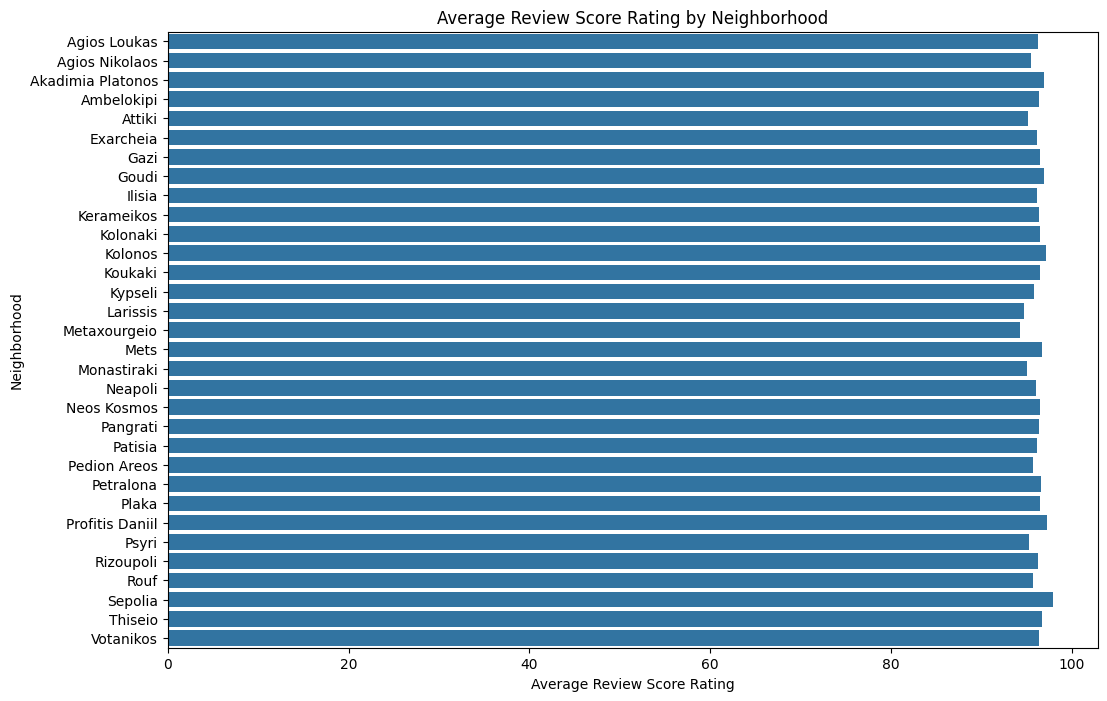

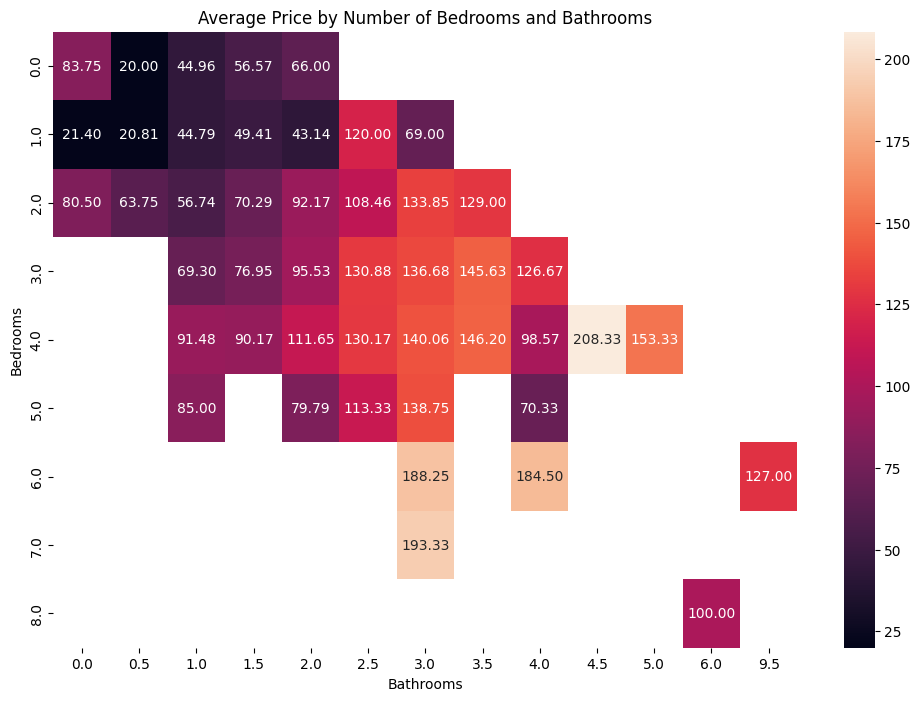

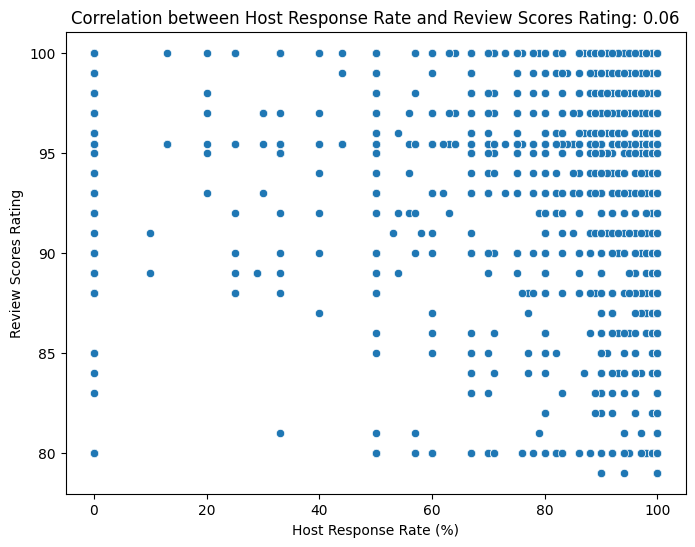

In [17]:
train_2019['price'] = train_2019['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert Host_response_rate to numeric (removing % sign and converting to float)
train_2019['host_response_rate'] = train_2019['host_response_rate'].str.rstrip('%').astype(float)

# Question 1: Average review score rating for each neighborhood
average_review_score_by_neighborhood = train_2019.groupby('neighbourhood')['review_scores_rating'].mean().reset_index()

# Plot for Question 1
plt.figure(figsize=(12, 8))
sns.barplot(data=average_review_score_by_neighborhood, x='review_scores_rating', y='neighbourhood')
plt.title('Average Review Score Rating by Neighborhood')
plt.xlabel('Average Review Score Rating')
plt.ylabel('Neighborhood')
plt.show()

# Question 2: Price variation with number of bedrooms and bathrooms
price_by_bedrooms_bathrooms = train_2019.groupby(['bedrooms', 'bathrooms'])['price'].mean().reset_index()

# Pivot table for better visualization
price_pivot = price_by_bedrooms_bathrooms.pivot(index='bedrooms', columns='bathrooms', values='price')

# Plot for Question 2
plt.figure(figsize=(12, 8))
sns.heatmap(price_pivot, annot=True, fmt=".2f")
plt.title('Average Price by Number of Bedrooms and Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Bedrooms')
plt.show()

# Question 3: Correlation between host's response rate and review scores rating
correlation = train_2019[['host_response_rate', 'review_scores_rating']].corr().iloc[0, 1]

# Plot for Question 3
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_2019, x='host_response_rate', y='review_scores_rating')
plt.title(f'Correlation between Host Response Rate and Review Scores Rating: {correlation:.2f}')
plt.xlabel('Host Response Rate (%)')
plt.ylabel('Review Scores Rating')
plt.show()

In [18]:
#1.14

biggest_hosts = train_2019.groupby('host_id')['id'].count().nlargest(10)
print('\nThe 10 host ids with the most listings are:\n')
print(biggest_hosts)

biggest_hosts = train_2023.groupby('host_id')['id'].count().nlargest(10)
print('\nThe 10 host ids with the most listings are:\n')
print(biggest_hosts)


The 10 host ids with the most listings are:

host_id
29927830     242
748818       221
1621474      192
135482892    169
112527018    160
1418201      159
65714690     117
2718115      113
2089542      107
149346682    107
Name: id, dtype: int64

The 10 host ids with the most listings are:

host_id
20104194     291
113548208    196
90390850     195
748818       189
113353393    122
182156346    122
1418201      121
123074489    121
114156592    118
47267002     114
Name: id, dtype: int64


2. Recommendation System

In [19]:
#2.1

# Concatenate 'name' and 'description' columns and fill NA with 'NULL'
train_2019['combined_text'] = train_2019['name'].fillna('NULL') + ' ' + train_2019['description'].fillna('NULL')

# Define stopwords
stop = stopwords.words('english')
stop = stop + [")", "(", ",", ".", "!"]

# Define TF-IDF vectorizer for unigrams and bigrams with stop words removed
tfidf_vectorizer = TfidfVectorizer(stop_words=stop, ngram_range=(1, 2))

# Fit and transform the combined text to TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(train_2019['combined_text'])

In [20]:
#2.2

# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Initialize dictionary to store top 100 similar properties for each property
similar_properties = {}

# Loop through each property
for idx, row in enumerate(cosine_sim_matrix):
    # Sort indices based on cosine similarity values and get top 100
    similar_indices = row.argsort()[-101:-1][::-1]
    # Store indices and cosine similarity values in dictionary
    similar_properties[idx] = [(i, row[i]) for i in similar_indices if i != idx]


In [21]:
# 2.3

def recommend(item_id, num):
    # Get the top <num> similar properties for the given item_id
    top_similar = similar_properties[item_id][:num]

    print(f"Recommending {num} listings similar to {train_2019.iloc[item_id]['name']}")
    print("-" * 60)

    # Loop through top similar properties and print their details
    for idx, (similar_idx, score) in enumerate(top_similar):
        if idx != similar_idx:
          name = train_2019.iloc[similar_idx]['name']
          description = train_2019.iloc[similar_idx]['description']
          print(f"Recommended: {name}")
          print(f"Description: {description}")
          print(f"(score: {score})")
          if idx < num - 1:
             print("-" * 60)


In [22]:
# 2.4

# Combine 'name' and 'description' columns into one corpus
corpus = ' '.join(train_2019['combined_text'].fillna('NULL'))

# Load stopwords
stop_words = set(stopwords.words('english'))
stop_words.update([".", ",", "(", ")", "!"])

# Tokenize the corpus
tokens = word_tokenize(corpus)

# Filter out stopwords
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Create a BigramCollocationFinder object
finder = BigramCollocationFinder.from_words(filtered_tokens)

# Compute bigram frequencies
bigram_freq = finder.ngram_fd.items()

# Filter bigrams with minimum frequency threshold
min_freq = 10
filtered_bigrams = [(bigram, freq) for bigram, freq in bigram_freq if freq >= min_freq]

# Sort filtered bigrams by frequency in descending order
sorted_filtered_bigrams = sorted(filtered_bigrams, key=lambda x: x[1], reverse=True)

# Get the top 10 collocated words
top_collocations = sorted_filtered_bigrams[:10]

# Print the top collocated words
print("Top 10 collocated words:")
for bigram, freq in top_collocations:
    print(bigram, ":", freq)

Top 10 collocated words:
('living', 'room') : 8615
('fully', 'equipped') : 6804
('metro', 'station') : 6204
('double', 'bed') : 5504
('walking', 'distance') : 5089
('equipped', 'kitchen') : 4136
('heart', 'Athens') : 4027
('center', 'Athens') : 3903
('apartment', 'located') : 3073
('sofa', 'bed') : 2378


In [23]:
# Example usage of recommend function
recommend(4125, 5)

Recommending 5 listings similar to Newly Renovated & Furnished City Center Apartment.
------------------------------------------------------------
Recommended: Newly Renovated & Furnished City Center Apartment.
Description: Newly furnished and renovated city center apartment. 4th Floor with two Elevators. Clean, spacious, Modern and will certainly feel like home. Athens city center, Omonia, Syntagma, Plaka and the Parthenon are within a few minutes from the apartment. The apartment consists of one  bedroom  with a double bed, large kitchen with dishwasher machine, bathroom, large living room with a sofa that is converted to a single bed. All rooms has aircondition for cold and hot air, heating is provided during winter cold days. The apartment is newly renovated and furnished. Guests will have access to the entire apartment. Dani will be more then happy to inform you with all necessary information in order to make your stay enjoyable and safe. We also inform the visitors for every impo